# Tarea 7

1. Descargar los datos de [datos abiertos](http://www.datos.gov.co)

2. Implementar:
- Regresion Lineal
- Random Forest

## 1. Datasets analizados
- Abonados de telefonia celular: https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Telefon-a-M-vil-abonados-por-categor-a/nrst-mwx4
- accidentalidad de Armenia: https://www.datos.gov.co/Transporte/Accidentalidad-y-hechos-de-tr-nsito-de-enero-de-20/r9ab-329t
- victimas en cartagena: https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/Victimas-en-Cartagena/v287-zzav
- Familias en accion: https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/Beneficiarios-M-s-Familias-en-Acci-n/xfif-myr2

## 2. Implementacion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pickle
import numpy as np

pd.options.display.float_format = '{:,.5f}'.format

In [2]:
f = r"data/Beneficiarios_M_s_Familias_en_Acci_n.csv.gz"
data = pd.read_csv(f, sep=',', dtype=str, na_values=['ND'], compression='gzip')

Filtrar sdolo los que recibieron el beneficio en `2018` y de un solo departamento `BOLIVAR`

In [3]:
data['FechaUltimoBeneficioAsignado'] = pd.to_datetime(data['FechaUltimoBeneficioAsignado'])
pd.concat([data['FechaUltimoBeneficioAsignado'].value_counts().sort_index(), data['FechaUltimoBeneficioAsignado'].value_counts(normalize=True).sort_index()],axis=1)

,FechaUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado
1900-01-01,936008,0.23515
2013-01-01,5164,0.00130
2014-01-01,150909,0.03791
2015-01-01,23772,0.00597
2016-01-01,24885,0.00625
2017-01-01,66406,0.01668
2018-01-01,2773402,0.69674


In [4]:
filtro = (data['FechaUltimoBeneficioAsignado']==pd.to_datetime('2018-01-01'))
data = data[filtro]

In [5]:
data['NombreDepartamentoAtencion'].value_counts()

ANTIOQUIA             334639
CORDOBA               197315
BOLIVAR               179126
VALLE                 159438
NARIÑO                159431
CAUCA                 147351
MAGDALENA             135902
ATLANTICO             121362
CESAR                 110480
SANTANDER             107297
TOLIMA                105364
NORTE DE SANTANDER    102207
CUNDINAMARCA          101557
HUILA                 101229
SUCRE                 100660
BOGOTA                 70511
META                   69365
LA GUAJIRA             66244
BOYACA                 65291
CHOCO                  50097
CAQUETA                49968
CALDAS                 45911
RISARALDA              42184
PUTUMAYO               41870
CASANARE               35647
ARAUCA                 27795
QUINDIO                21071
GUAVIARE                9655
AMAZONAS                5385
SAN ANDRES              2748
VICHADA                 2562
GUAINIA                 2413
VAUPES                  1327
Name: NombreDepartamentoAtencion, dtype: in

In [6]:
filtro = (data['NombreDepartamentoAtencion']=='BOLIVAR')
data = data[filtro]

# EDA

In [7]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179126 entries, 57 to 3980515
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Bancarizado                        175821 non-null  object        
 1   CodigoDepartamentoAtencion         179126 non-null  object        
 2   CodigoMunicipioAtencion            179126 non-null  object        
 3   Discapacidad                       177423 non-null  object        
 4   EstadoBeneficiario                 179126 non-null  object        
 5   Etnia                              19184 non-null   object        
 6   FechaInscripcionBeneficiario       179126 non-null  object        
 7   Genero                             179118 non-null  object        
 8   NivelEscolaridad                   707 non-null     object        
 9   NombreDepartamentoAtencion         179126 non-null  object        
 10  NombreMunicipioAte

,Bancarizado,CodigoDepartamentoAtencion,CodigoMunicipioAtencion,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,NombreDepartamentoAtencion,...,TipoAsignacionBeneficio,TipoBeneficio,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios
57,SI,13,13744,NO,ACTIVO,NaN,2014-05-01,Mujer,NaN,BOLIVAR,...,MONETARIO,NaN,CC,DESPLAZADOS,3.000.001 - 4.500.000,0 - 1.300.000,2018-01-01,30-49,SI,1
85,SI,13,13744,NO,ACTIVO,NaN,2015-04-01,Mujer,NaN,BOLIVAR,...,MONETARIO,NaN,CC,DESPLAZADOS,1.500.001 - 3.000.000,0 - 1.300.000,2018-01-01,50-65,SI,1
188,SI,13,13062,NO,ACTIVO,NaN,2013-01-01,Hombre,NaN,BOLIVAR,...,MONETARIO,NaN,CC,UNIDOS,0 - 1.500.000,0 - 1.300.000,2018-01-01,>65,SI,1
286,NaN,13,13442,NO,ACTIVO,NaN,2018-02-01,Mujer,NaN,BOLIVAR,...,MONETARIO,NUTRICIÓN,CC,SISBEN,0 - 1.500.000,0 - 1.300.000,2018-01-01,18-29,SI,1
330,NaN,13,13442,NaN,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Mujer,NaN,BOLIVAR,...,MONETARIO,NUTRICIÓN,CC,SISBEN,> 6.000.001,0 - 1.300.000,2018-01-01,30-49,SI,1


In [8]:
data.isnull().sum()

Bancarizado                            3305
CodigoDepartamentoAtencion                0
CodigoMunicipioAtencion                   0
Discapacidad                           1703
EstadoBeneficiario                        0
Etnia                                159942
FechaInscripcionBeneficiario              0
Genero                                    8
NivelEscolaridad                     178419
NombreDepartamentoAtencion                0
NombreMunicipioAtencion                   0
Pais                                 175356
TipoAsignacionBeneficio                 159
TipoBeneficio                        138277
TipoDocumento                             0
TipoPoblacion                             0
RangoBeneficioConsolidadoAsignado         0
RangoUltimoBeneficioAsignado              0
FechaUltimoBeneficioAsignado              0
RangoEdad                                 0
Titular                                   0
CantidadDeBeneficiarios                   0
dtype: int64

In [9]:
for c in ['Bancarizado','EstadoBeneficiario','Pais','TipoAsignacionBeneficio','TipoBeneficio']:
    print('*'*50, c)
    print(pd.concat([data[c].value_counts(dropna=False), data[c].value_counts(dropna=False, normalize=True)], axis=1))
    print('')

************************************************** Bancarizado
     Bancarizado  Bancarizado
SI        106562      0.59490
NO         69259      0.38665
NaN         3305      0.01845

************************************************** EstadoBeneficiario
           EstadoBeneficiario  EstadoBeneficiario
ACTIVO                 177596             0.99146
NO ACTIVO                1530             0.00854

************************************************** Pais
            Pais    Pais
NaN       175356 0.97895
Colombia    2888 0.01612
COLOMBIA     856 0.00478
57            17 0.00009
169            9 0.00005

************************************************** TipoAsignacionBeneficio
           TipoAsignacionBeneficio  TipoAsignacionBeneficio
MONETARIO                   178967                  0.99911
NaN                            159                  0.00089

************************************************** TipoBeneficio
                               TipoBeneficio  TipoBeneficio
NaN    

In [10]:
data['RangoBeneficioConsolidadoAsignado'].value_counts().sort_index()

0 - 1.500.000            19602
1.500.001 - 3.000.000    38575
3.000.001 - 4.500.000    48294
4.500.001 - 6.000.000    42829
> 6.000.001              29826
Name: RangoBeneficioConsolidadoAsignado, dtype: int64

In [11]:
data.groupby(['RangoBeneficioConsolidadoAsignado','RangoUltimoBeneficioAsignado'], dropna=False).size()

RangoBeneficioConsolidadoAsignado  RangoUltimoBeneficioAsignado
0 - 1.500.000                      0 - 1.300.000                   19602
1.500.001 - 3.000.000              0 - 1.300.000                   38575
3.000.001 - 4.500.000              0 - 1.300.000                   48294
4.500.001 - 6.000.000              0 - 1.300.000                   42829
> 6.000.001                        0 - 1.300.000                   29826
dtype: int64

In [12]:
data.groupby(['RangoBeneficioConsolidadoAsignado','EstadoBeneficiario'], dropna=False).size()/len(data)

RangoBeneficioConsolidadoAsignado  EstadoBeneficiario
0 - 1.500.000                      ACTIVO               0.10691
                                   NO ACTIVO            0.00252
1.500.001 - 3.000.000              ACTIVO               0.21286
                                   NO ACTIVO            0.00250
3.000.001 - 4.500.000              ACTIVO               0.26728
                                   NO ACTIVO            0.00233
4.500.001 - 6.000.000              ACTIVO               0.23823
                                   NO ACTIVO            0.00087
> 6.000.001                        ACTIVO               0.16617
                                   NO ACTIVO            0.00033
dtype: float64

# FT ing

Definiendo el target ---> `RangoBeneficioConsolidadoAsignado`

In [13]:
data0 = data.copy()
print(data.shape, data0.shape)

(179126, 22) (179126, 22)


In [14]:
target = 'RangoBeneficioConsolidadoAsignado'

In [15]:
cols_date = ['FechaInscripcionBeneficiario','FechaUltimoBeneficioAsignado']
for c in cols_date:
    data0[c] = pd.to_datetime(data0[c])

In [16]:
filtro = data0['FechaUltimoBeneficioAsignado']==pd.to_datetime('1900-01-01')
data0.loc[filtro,'FechaUltimoBeneficioAsignado'] = data0[filtro]['FechaInscripcionBeneficiario']

In [17]:
data0['antiguedad'] = (data0['FechaUltimoBeneficioAsignado'] - data0['FechaInscripcionBeneficiario']).dt.days
data0['antiguedad'] = data0['antiguedad']/365.5

In [18]:
(data0['antiguedad']<0).value_counts()

False    178989
True        137
Name: antiguedad, dtype: int64

In [19]:
data0['CantidadDeBeneficiarios'] = pd.to_numeric(data0['CantidadDeBeneficiarios'])

In [20]:
data0['Discapacidad'] = data0['Discapacidad'].fillna('NO')
data0['TipoPoblacion'] = data0['TipoPoblacion'].fillna('ND')
data0['Bancarizado'] = data0['Bancarizado'].fillna('ND')

Encode target

In [21]:
target_labels = dict((v,k) for k,v in enumerate(data0[target].value_counts(dropna=False).sort_index().index))
target_labels

{'0 - 1.500.000': 0,
 '1.500.001 - 3.000.000': 1,
 '3.000.001 - 4.500.000': 2,
 '4.500.001 - 6.000.000': 3,
 '> 6.000.001': 4}

In [22]:
print(data0[target].value_counts().sort_index())
data0[target] = data0[target].replace(target_labels)
print(data0[target].value_counts().sort_index())

0 - 1.500.000            19602
1.500.001 - 3.000.000    38575
3.000.001 - 4.500.000    48294
4.500.001 - 6.000.000    42829
> 6.000.001              29826
Name: RangoBeneficioConsolidadoAsignado, dtype: int64
0    19602
1    38575
2    48294
3    42829
4    29826
Name: RangoBeneficioConsolidadoAsignado, dtype: int64


## Limpieza

In [23]:
data0 = data0[[c for c in data0 if c!=target]+[target]]

In [24]:
## donde la antiguedad sea positiva
data0 = data0[data0['antiguedad']>=0]

In [25]:
## variables que no se van a incluir
cols_2_drop = ['NombreMunicipioAtencion','FechaUltimoBeneficioAsignado','CodigoDepartamentoAtencion','CodigoMunicipioAtencion','FechaInscripcionBeneficiario','FechaUltimoBeneficioAsignado','Pais','TipoAsignacionBeneficio','RangoUltimoBeneficioAsignado']
data0 = data0.drop(cols_2_drop,axis=1)

In [26]:
## variables con missing >50%
cols_2_drop = (data0.isnull().sum() / len(data0))>0.5
cols_2_drop = list(cols_2_drop[cols_2_drop].index)
print(cols_2_drop)
data0 = data0.drop(cols_2_drop,axis=1)

['Etnia', 'NivelEscolaridad', 'TipoBeneficio']


In [27]:
data0 = data0.dropna()
data1 = data0.copy()

Get dummies `data0`

In [28]:
data0 = pd.get_dummies(data0, prefix_sep='__', drop_first=True)
data0 = data0[[c for c in data0 if c!=target]+[target]]
print(data0.info())
data0.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178981 entries, 57 to 3980515
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CantidadDeBeneficiarios            178981 non-null  int64  
 1   antiguedad                         178981 non-null  float64
 2   Bancarizado__NO                    178981 non-null  uint8  
 3   Bancarizado__SI                    178981 non-null  uint8  
 4   Discapacidad__SI                   178981 non-null  uint8  
 5   EstadoBeneficiario__NO ACTIVO      178981 non-null  uint8  
 6   Genero__Mujer                      178981 non-null  uint8  
 7   TipoDocumento__CE                  178981 non-null  uint8  
 8   TipoDocumento__No Definido         178981 non-null  uint8  
 9   TipoDocumento__RC                  178981 non-null  uint8  
 10  TipoDocumento__TI                  178981 non-null  uint8  
 11  TipoPoblacion__INDIGENAS           17

,CantidadDeBeneficiarios,antiguedad,Bancarizado__NO,Bancarizado__SI,Discapacidad__SI,EstadoBeneficiario__NO ACTIVO,Genero__Mujer,TipoDocumento__CE,TipoDocumento__No Definido,TipoDocumento__RC,...,TipoPoblacion__INDIGENAS,TipoPoblacion__SISBEN,TipoPoblacion__UNIDOS,RangoEdad__06-17,RangoEdad__18-29,RangoEdad__30-49,RangoEdad__50-65,RangoEdad__>65,Titular__SI,RangoBeneficioConsolidadoAsignado
57,1,3.66895,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,2
85,1,2.75239,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
188,1,4.99590,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
330,1,5.08071,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,4
356,1,5.24761,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [29]:
# ## prep memory
# try:
#     del data
# except:
#     pass
# gc.collect()

In [30]:
# data_2_save = {"target_labels":target_labels, "data0": data0}
# fName = 'data\data.pickle'
# with open(fName, 'wb') as handle:
#     pickle.dump(data_2_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [31]:
# try:
#     data0.shape
#     target_labels
# except:
#     with open('data\data.pickle', 'rb') as handle:
#         b = pickle.load(handle)
#         data0 = b['data0']
#         target_labels = b['target_labels']
# finally:
#     print(data0.shape)

# ML

In [32]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [33]:
def make_data(data,target):
    X    = data.drop(target,axis=1).copy()
    y    = data0[target].copy()
    print('X.shape=', X.shape, ', y.shape=', y.shape)
    # splitting the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    print("x_train=",len(x_train),", x_test=",len(x_test), ", y_train=",len(y_train),", y_test=",len(y_test))
    return X, y, x_train, y_train, x_test, y_test

## Base line

In [34]:
import statsmodels.api as sm

In [35]:
X, y, x_train, y_train, x_test, y_test = make_data(data=data0,target=target)

X.shape= (178981, 20) , y.shape= (178981,)
x_train= 143184 , x_test= 35797 , y_train= 143184 , y_test= 35797


In [36]:
LRS = sm.OLS(y,sm.add_constant(X))
LRS = LRS.fit()

In [37]:
LRS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     RangoBeneficioConsolidadoAsignado   R-squared:                       0.326
Model:                                           OLS   Adj. R-squared:                  0.326
Method:                                Least Squares   F-statistic:                     4321.
Date:                               Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                                       19:47:14   Log-Likelihood:            -2.5716e+05
No. Observations:                             178981   AIC:                         5.144e+05
Df Residuals:                                 178960   BIC:                         5.146e+05
Df Model:                                         20                                         
Covariance Type:                           nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3780      1.055      0.359      0.720      -1.689       2.445
CantidadDeBeneficiarios          -0.0745      0.003    -26.889      0.000      -0.080      -0.069
antiguedad                        0.4281      0.003    140.275      0.000       0.422       0.434
Bancarizado__NO                  -0.6809      0.020    -34.636      0.000      -0.719      -0.642
Bancarizado__SI                   0.2105      0.020     10.778      0.000       0.172       0.249
Discapacidad__SI                  0.1450      0.123      1.182      0.237      -0.096       0.386
EstadoBeneficiario__NO ACTIVO    -0.2554      0.026     -9.697      0.000      -0.307      -0.204
Genero__Mujer                     0.0896      0.007     12.580      0.000       0.076       0.104
TipoDocumento__CE                 0.0089      0.340      0.026      0.979      -0.657       0.675
TipoDocumento__No Definido       -0.0989      0.092     -1.070      0.285      -0.280       0.082
TipoDocumento__RC                -0.0838      0.262     -0.321      0.749      -0.596       0.429
TipoDocumento__TI                -0.5293      0.050    -10.592      0.000      -0.627      -0.431
TipoPoblacion__INDIGENAS          0.1730      0.588      0.294      0.769      -0.980       1.326
TipoPoblacion__SISBEN            -0.1048      0.006    -16.571      0.000      -0.117      -0.092
TipoPoblacion__UNIDOS            -0.2115      0.008    -26.480      0.000      -0.227      -0.196
RangoEdad__06-17                 -0.0477      1.079     -0.044      0.965      -2.163       2.068
RangoEdad__18-29                  0.1966      1.051      0.187      0.852      -1.863       2.257
RangoEdad__30-49                  0.1987      1.051      0.189      0.850      -1.861       2.259
RangoEdad__50-65                 -0.5917      1.051     -0.563      0.573      -2.652       1.468
RangoEdad__>65                   -0.9224      1.051     -0.878      0.380      -2.983       1.138
Titular__SI                      -0.0237      0.083     -0.285      0.776      -0.187       0.140
==============================================================================
Omnibus:                     1567.426   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1038.100
Skew:                          -0.032   Prob(JB):                    3.80e-226
Kurtosis:                       2.632   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly spe

In [38]:
best_pv = LRS.pvalues[LRS.pvalues<0.05]
best_pv

CantidadDeBeneficiarios         0.00000
antiguedad                      0.00000
Bancarizado__NO                 0.00000
Bancarizado__SI                 0.00000
EstadoBeneficiario__NO ACTIVO   0.00000
Genero__Mujer                   0.00000
TipoDocumento__TI               0.00000
TipoPoblacion__SISBEN           0.00000
TipoPoblacion__UNIDOS           0.00000
dtype: float64

In [39]:
LRS2 = sm.OLS(y,sm.add_constant(X[best_pv.keys()]))
LRS2 = LRS2.fit()

In [40]:
LRS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     RangoBeneficioConsolidadoAsignado   R-squared:                       0.229
Model:                                           OLS   Adj. R-squared:                  0.229
Method:                                Least Squares   F-statistic:                     5903.
Date:                               Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                                       19:47:14   Log-Likelihood:            -2.6916e+05
No. Observations:                             178981   AIC:                         5.383e+05
Df Residuals:                                 178971   BIC:                         5.384e+05
Df Model:                                          9                                         
Covariance Type:                           nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.4917      0.023     21.395      0.000       0.447       0.537
CantidadDeBeneficiarios          -0.0929      0.003    -31.410      0.000      -0.099      -0.087
antiguedad                        0.3836      0.003    120.256      0.000       0.377       0.390
Bancarizado__NO                  -0.7042      0.020    -34.401      0.000      -0.744      -0.664
Bancarizado__SI                   0.2221      0.020     10.931      0.000       0.182       0.262
EstadoBeneficiario__NO ACTIVO    -0.3349      0.028    -11.912      0.000      -0.390      -0.280
Genero__Mujer                     0.1450      0.008     19.091      0.000       0.130       0.160
TipoDocumento__TI                -0.3260      0.053     -6.171      0.000      -0.429      -0.222
TipoPoblacion__SISBEN            -0.0773      0.007    -11.453      0.000      -0.091      -0.064
TipoPoblacion__UNIDOS            -0.2452      0.009    -28.731      0.000      -0.262      -0.228
==============================================================================
Omnibus:                     7042.519   Durbin-Watson:                   0.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3301.043
Skew:                          -0.109   Prob(JB):                         0.00
Kurtosis:                       2.371   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression

In [41]:
# importing module
from sklearn.linear_model import LinearRegression

In [42]:
# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
prediction_LR =  LR.predict(x_test)
prediction_LR

array([2.88161254, 2.88161254, 1.72135688, ..., 1.8873274 , 2.84659142,
       2.81235246])

In [43]:
# Distribucion de las prediciones
pd.DataFrame([int(round(x,0)) for x in prediction_LR]).value_counts()

 2    14929
 3    14256
 1     5929
 0      629
-1       51
-2        2
-5        1
dtype: int64

Feature: 0 CantidadDeBeneficiarios, Score: -0.0720045178183172
Feature: 1 antiguedad, Score: 0.4266740371661438
Feature: 2 Bancarizado__NO, Score: -0.6940471522902428
Feature: 3 Bancarizado__SI, Score: 0.19719462239284577
Feature: 4 Discapacidad__SI, Score: 0.146625184024681
Feature: 5 EstadoBeneficiario__NO ACTIVO, Score: -0.25732573737354497
Feature: 6 Genero__Mujer, Score: 0.08596866992671542
Feature: 7 TipoDocumento__CE, Score: -0.046227869465805156
Feature: 8 TipoDocumento__No Definido, Score: -0.16370219015244517
Feature: 9 TipoDocumento__RC, Score: -0.2675721129521605
Feature: 10 TipoDocumento__TI, Score: -0.565200046603593
Feature: 11 TipoPoblacion__INDIGENAS, Score: 0.17515288822028027
Feature: 12 TipoPoblacion__SISBEN, Score: -0.10537817849676745
Feature: 13 TipoPoblacion__UNIDOS, Score: -0.21082675744290377
Feature: 14 RangoEdad__06-17, Score: 0.17403528734827645
Feature: 15 RangoEdad__18-29, Score: 0.01949138429414459
Feature: 16 RangoEdad__30-49, Score: 0.02694395154387688

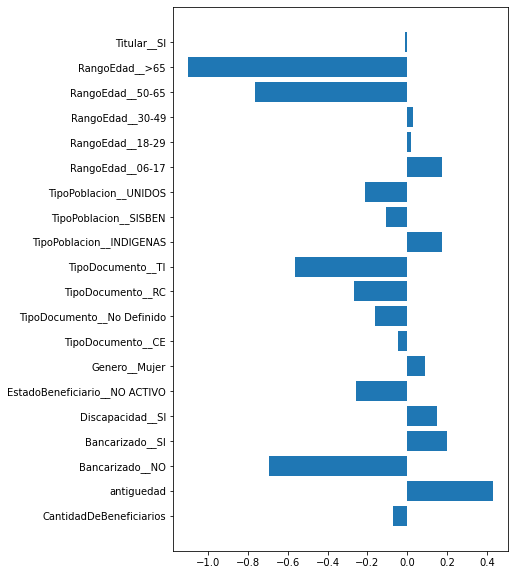

In [44]:
# get importance
var=LR.feature_names_in_
importance = LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {i} {X.columns[i]}, Score: {v}')
# plot feature importance
plt.figure(figsize=(6, 10))
plt.barh(var, importance)
plt.show()

In [45]:
important=pd.DataFrame({"variable":var,"importance":importance})
important['abs'] = abs(important["importance"])
important.sort_values(by=["abs","importance"], ascending=[False,True])

,variable,importance,abs
18,RangoEdad__>65,-1.09829,1.09829
17,RangoEdad__50-65,-0.76377,0.76377
2,Bancarizado__NO,-0.69405,0.69405
10,TipoDocumento__TI,-0.56520,0.56520
1,antiguedad,0.42667,0.42667
9,TipoDocumento__RC,-0.26757,0.26757
5,EstadoBeneficiario__NO ACTIVO,-0.25733,0.25733
13,TipoPoblacion__UNIDOS,-0.21083,0.21083
3,Bancarizado__SI,0.19719,0.19719
11,TipoPoblacion__INDIGENAS,0.17515,0.17515


## Evaluacion de modelos

In [46]:
X, y, x_train, y_train, x_test, y_test = make_data(data=data0,target=target)

X.shape= (178981, 20) , y.shape= (178981,)
x_train= 143184 , x_test= 35797 , y_train= 143184 , y_test= 35797


In [47]:
## contenedor de predicciones
predict = pd.DataFrame()
predict['target'] = data0[target]

#### Statsmodels

In [48]:
LRS = sm.OLS(y,sm.add_constant(X)).fit()
predictions_LRS = LRS.predict() 
predict['LinearRegression_Statsmodels'] = predictions_LRS
predictions_LRS

array([2.34941856, 1.16664064, 1.49526133, ..., 2.77850982, 1.74656067,
       2.54896767])

#### Regresion Lineal

In [49]:
LR1 = LinearRegression()
##
LR1.fit(x_train,y_train)
predictions_LR1 = LR1.predict(X)
predict['LinearRegression'] = predictions_LR1
predictions_LR1

array([2.34960625, 1.167824  , 1.49375114, ..., 2.7897961 , 1.7613424 ,
       2.56342813])

#### Regresion Lineal (Sin intercepto)

In [50]:
## sin intercepto
LR2 = LinearRegression(fit_intercept=False)
# fitting the training data
LR2.fit(x_train,y_train)
predictions_LR2=LR2.predict(X)
predict['LinearRegression(NO costant)'] = predictions_LR2
predictions_LR2

array([2.34959131, 1.16779522, 1.49374112, ..., 2.78961918, 1.7611341 ,
       2.56324531])

#### Random Forest

In [51]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor

In [52]:
 # create regressor object
RF = RandomForestRegressor(n_estimators = 10, random_state=42)
# fit the regressor with x and y data
RF.fit(X, y) 
predictions_RF=RF.predict(X)
predict['RandomForest_n=10'] = predictions_RF

In [53]:
 # create regressor object
RF2 = RandomForestRegressor(n_estimators = 100, random_state=42)
# fit the regressor with x and y data
RF2.fit(X, y) 
predictions_RF2=RF2.predict(X)
predict['RandomForest_n=100'] = predictions_RF2

In [54]:
 # create regressor object
RF3 = RandomForestRegressor(n_estimators = 1000, random_state=42)
# fit the regressor with x and y data
RF3.fit(X, y) 
predictions_RF3=RF3.predict(X)
predict['RandomForest_n=1000'] = predictions_RF3

In [55]:
 # create regressor object
RF4 = RandomForestRegressor(n_estimators = 1000, random_state=42, max_depth=5)
# fit the regressor with x and y data
RF4.fit(X, y) 
predictions_RF4=RF4.predict(X)
predict['RandomForest_n=1000_mx=5'] = predictions_RF4

In [56]:
## ajuste
predict = predict.reset_index().rename(columns={'index':'id'})
predict.head()

,id,target,LinearRegression_Statsmodels,LinearRegression,LinearRegression(NO costant),RandomForest_n=10,RandomForest_n=100,RandomForest_n=1000,RandomForest_n=1000_mx=5
0,57,2,2.34942,2.34961,2.34959,2.11392,2.13049,2.14391,2.82475
1,85,1,1.16664,1.16782,1.16780,1.30720,1.28078,1.26987,1.07523
2,188,0,1.49526,1.49375,1.49374,1.28404,1.35753,1.36053,2.03873
3,330,4,2.63861,2.64940,2.64923,3.16137,3.17130,3.18508,2.70218
4,356,0,0.93172,0.91158,0.90759,1.03333,0.94310,1.00064,1.17761


# Metrics

In [57]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [58]:
models = {
    'LinearRegression(Statsmodels)': {
        'model': LR
        , 'r2_score': r2_score(y,predictions_LRS)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_LRS))
    }
    , 'LinearRegression': {
        'model': LR
        , 'r2_score': r2_score(y,predictions_LR1)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_LR1))
    }
    , 'LinearRegression(NO costant)': {
        'model': LR2
        , 'r2_score': r2_score(y,predictions_LR2)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_LR2))
    }
    , 'RandomForest_n=10': {
        'model': RF
        , 'r2_score': r2_score(y,predictions_RF)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_RF))
    }
    , 'RandomForest_n=100':{
        'model': RF2
        , 'r2_score': r2_score(y,predictions_RF2)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_RF2))
    }
    , 'RandomForest_n=1000':{
        'model': RF3
        , 'r2_score': r2_score(y,predictions_RF3)
        , 'rms2': np.sqrt(mean_squared_error(y,predictions_RF3))
    }
    # , 'RandomForest_n=1000_mx=5':{
    #     'model': RF4
    #     , 'r2_score': r2_score(y,predictions_RF4)
    #     , 'rms2': np.sqrt(mean_squared_error(y,predictions_RF4))
    # }
}
models

{'LinearRegression(Statsmodels)': {'model': LinearRegression(),
  'r2_score': 0.32563308165881233,
  'rms2': 1.018047647942379},
 'LinearRegression': {'model': LinearRegression(),
  'r2_score': 0.3256147495583539,
  'rms2': 1.0180614852351149},
 'LinearRegression(NO costant)': {'model': LinearRegression(fit_intercept=False),
  'r2_score': 0.3256144552043331,
  'rms2': 1.0180617074155813},
 'RandomForest_n=10': {'model': RandomForestRegressor(n_estimators=10, random_state=42),
  'r2_score': 0.3780182292625154,
  'rms2': 0.9777071796162193},
 'RandomForest_n=100': {'model': RandomForestRegressor(random_state=42),
  'r2_score': 0.3784643884907887,
  'rms2': 0.9773564528302483},
 'RandomForest_n=1000': {'model': RandomForestRegressor(n_estimators=1000, random_state=42),
  'r2_score': 0.3785002800255205,
  'rms2': 0.9773282329431997}}

In [59]:
# se prefiere un menor RMSE
pd.DataFrame.from_dict(models,orient='index').drop('model',axis=1).sort_values('rms2')

,r2_score,rms2
RandomForest_n=1000,0.37850,0.97733
RandomForest_n=100,0.37846,0.97736
RandomForest_n=10,0.37802,0.97771
LinearRegression(Statsmodels),0.32563,1.01805
LinearRegression,0.32561,1.01806
LinearRegression(NO costant),0.32561,1.01806


## Plotting

In [60]:
## data structure for plotting
predict_plt = predict.drop('RandomForest_n=1000_mx=5',axis=1)
predict_plt = predict_plt.melt(id_vars=['id','target'], var_name='model', value_name='predict')
predict_plt.head()

,id,target,model,predict
0,57,2,LinearRegression_Statsmodels,2.34942
1,85,1,LinearRegression_Statsmodels,1.16664
2,188,0,LinearRegression_Statsmodels,1.49526
3,330,4,LinearRegression_Statsmodels,2.63861
4,356,0,LinearRegression_Statsmodels,0.93172


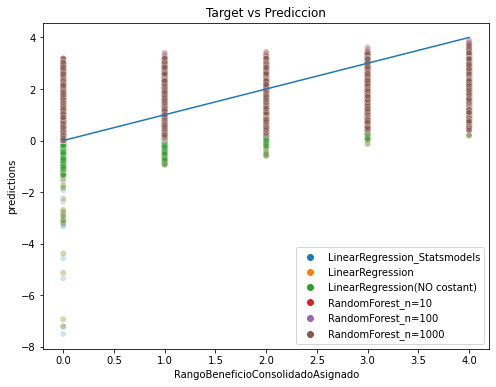

In [61]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(data=predict_plt, x="target", y="predict", alpha=0.2, hue="model")
u=np.linspace(data0[target].min(),data0[target].max(),5)
plt.plot(u,u)
plt.xlabel(target)
plt.ylabel("predictions")
plt.legend()
plt.title("Target vs Prediccion")
fig.savefig(f'fig1.png')
plt.show()

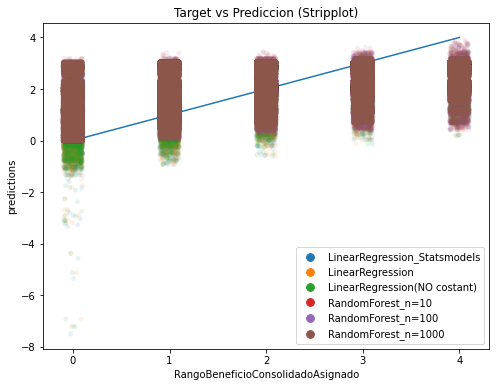

In [62]:
fig = plt.figure(figsize=(8,6))
sns.stripplot(data=predict_plt, x="target", y="predict", alpha=0.1, hue="model")
u=np.linspace(data0[target].min(),data0[target].max(),5)
plt.plot(u,u)
plt.xlabel(target)
plt.ylabel("predictions")
plt.legend()
plt.title("Target vs Prediccion (Stripplot)")
fig.savefig(f'fig2.png')
plt.show()

In [63]:
from sklearn import tree

In [64]:
def plot_r_tree(model,i,target):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,8), dpi=800)
    tree.plot_tree(model.estimators_[i],
                feature_names = X.columns, 
                class_names=[target],
                filled = True, fontsize=4)
    fig.savefig(f'rf_individualtree_{i}.png')
    fig.show()
    return

In [65]:
plot_r_tree(model=RF4,i=0,target=target)

C:\Users\dherrera\AppData\Local\Temp\8\ipykernel_44364\1762380682.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


# Entregable
- Nombre de la ponencia
- autor de la ponencia
- descripcion del problema
- descripcion de los datos
- metodologia usada: lineal y rf
- que resultados obtuvo
- trabajo futuro
- un grafico final

Entregable: PDF, maximo 1 pag
